In [1]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import cdt
from cdt.causality.graph import PC
import networkx as nx

import utils.graph_utils
import utils.globals as uglobals

import os

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [2]:
def json_to_df(data):
    out = {}
    
    for model_idx, (model, results) in enumerate(data.items()):
        # out['model'].append(model_idx)
        # out['model'].append(model)
        for subject, score in results.items():
            if subject not in out.keys():
                out[subject] = []
            out[subject].append(float(score))
    out = pd.DataFrame(out)
    return out

def make_graph(node_list):
    g = nx.DiGraph()
    
    for s in node_list:
        for e in node_list:
            if e == 'n_params':
                continue
            g.add_edges_from([(s, e)])
    
    return g


def run_pc(exp_name, alpha=0.15):
    with open(f'{uglobals.AGGREGATED_OUTPUT_DIR}/{exp_name}.json') as f:
        data = json.load(f)

    df = json_to_df(data)
    
    obj = PC(alpha=alpha)
    out = obj.predict(df_data=df)

    return out


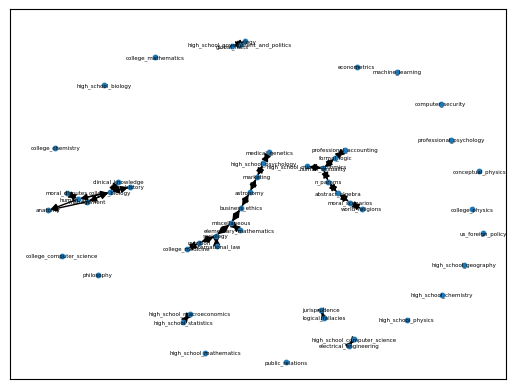

[('abstract_algebra', 'moral_scenarios'), ('abstract_algebra', 'n_params'), ('astronomy', 'business_ethics'), ('astronomy', 'marketing'), ('business_ethics', 'astronomy'), ('business_ethics', 'miscellaneous'), ('clinical_knowledge', 'college_biology'), ('college_biology', 'clinical_knowledge'), ('college_biology', 'human_aging'), ('college_biology', 'management'), ('college_biology', 'prehistory'), ('college_medicine', 'nutrition'), ('electrical_engineering', 'high_school_computer_science'), ('elementary_mathematics', 'miscellaneous'), ('formal_logic', 'human_sexuality'), ('formal_logic', 'professional_accounting'), ('global_facts', 'virology'), ('high_school_computer_science', 'electrical_engineering'), ('high_school_macroeconomics', 'high_school_statistics'), ('high_school_microeconomics', 'human_sexuality'), ('high_school_psychology', 'marketing'), ('high_school_psychology', 'medical_genetics'), ('high_school_statistics', 'high_school_macroeconomics'), ('human_aging', 'anatomy'), ('

In [8]:
# Draw overall output
name = 'aggregated_5shot_spec_continuous'
out = run_pc(name)

nx.draw_networkx(out, node_size=10, font_size=4)
plt.savefig(f'{uglobals.FIGS_DIR}/{name}', dpi=1000)
plt.show()
print(out.edges)
print(len(out.edges))

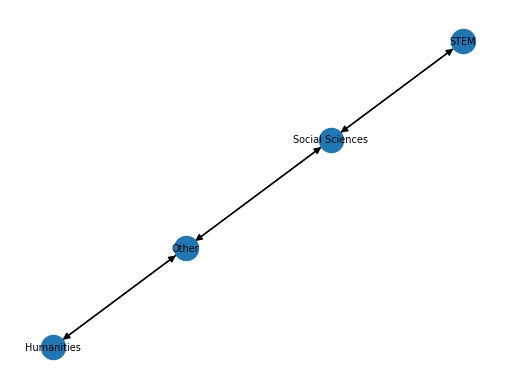

In [7]:
# Draw Cliques
out_copy = out.copy()
out_copy.remove_nodes_from(list(nx.isolates(out_copy)))

idx = 0
while len(out_copy.nodes) > 0:

    for node in out_copy.nodes:
        cur_node = node
        cur_clique = [node]
        break

    for node in out_copy.nodes:
        if node in nx.descendants(out_copy, cur_node) or cur_node in nx.descendants(out_copy, node):
            cur_clique.append(node)

    out_copy_copy = out_copy.copy()

    out_copy.remove_nodes_from(cur_clique)
    out_copy_copy.remove_nodes_from(out_copy.nodes)

    plt.cla()
    nx.draw_networkx(out_copy_copy, font_size=7)
    plt.box(False)
    plt.savefig(f'{uglobals.FIGS_DIR}/{name}_clique_{idx}', dpi=1000)
    idx += 1


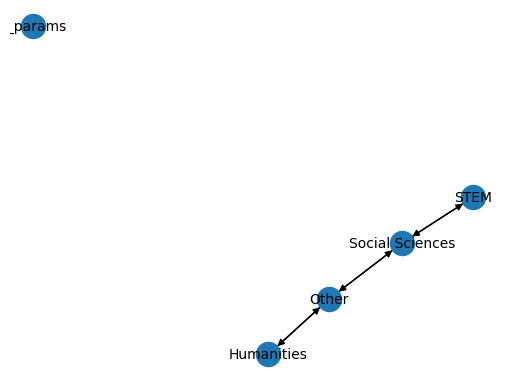

[('STEM', 'Social Sciences'), ('Other', 'Social Sciences'), ('Other', 'Humanities'), ('Social Sciences', 'STEM'), ('Social Sciences', 'Other'), ('Humanities', 'Other')]
5


In [5]:
# Draw grouped output
name = 'aggregated_5shot_grouped_spec_continuous'
out = run_pc(name)

nx.draw_networkx(out, font_size=10, pos=())
plt.savefig(f'{uglobals.FIGS_DIR}/{name}', dpi=1000)
plt.show()
print(out.edges)
print(len(out))